In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URL = 'https://drive.google.com/file/d/1RxokJrLFbeqtHk6RtYyl1XeOQv7AJ-PO/view?usp=sharing'
# path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv("/content/heartdisease project Dataset.csv")
df.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1361 non-null   int64  
 1   sex       1361 non-null   int64  
 2   cp        1361 non-null   int64  
 3   trestbps  1361 non-null   int64  
 4   chol      1361 non-null   int64  
 5   fbs       1361 non-null   int64  
 6   restecg   1361 non-null   int64  
 7   thalach   1361 non-null   int64  
 8   exang     1361 non-null   int64  
 9   oldpeak   1361 non-null   float64
 10  slope     1361 non-null   int64  
 11  ca        1361 non-null   int64  
 12  thal      1361 non-null   int64  
 13  target    1361 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 149.0 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<ipython-input-83-b52fe8309cb7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="target", data=df, ax=ax[1], order=target, palette=p_colors)


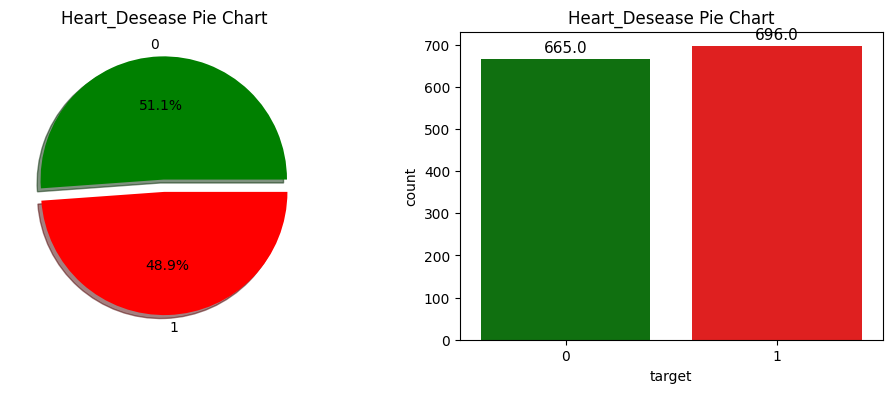

In [ ]:
p_colors = ['green', 'red'] # Added one more color
target = [0,1] # Added one more potential value to match the number of colors and corrected the names to match the df
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["target"].value_counts().plot(kind="pie", labels=target,
        colors=p_colors,explode=[0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True) # Added one more explode value
ax[0].set_title("Heart_Desease Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="target", data=df, ax=ax[1], order=target, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Heart_Desease Pie Chart")
plt.show()

# **Accuracy**

In [ ]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Original Dataset
X = df.drop("target", axis=1)
y = df['target']

x_train, x_test, y_train, y_test = split(X, y, test_size=0.20, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")

Original data has 1088 train data and 273 test data



In [ ]:
# Using original dataset
rf = DecisionTreeClassifier(random_state=50)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")



Test Accuracy: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=50)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.989010989010989


In [ ]:
# Using original dataset
et = ExtraTreesClassifier(random_state=50)
et.fit(x_train, y_train)
y_pred = et.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.989010989010989


In [ ]:
# Using original dataset
svc = SVC(random_state=50)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.673992673992674


# **Crossvalidation For DT**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the cross-validation strategy (e.g., StratifiedKFold)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
# Use dt_classifier instead of 'model' (which is undefined)
scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

# Print accuracy for each iteration
print("Accuracy for each fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.4f}")

# Print average accuracy
print(f"\nAverage Accuracy: {scores.mean():.4f}")

Accuracy for each fold:
Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 0.9779
Fold 5: 1.0000
Fold 6: 1.0000
Fold 7: 1.0000
Fold 8: 1.0000
Fold 9: 1.0000
Fold 10: 1.0000

Average Accuracy: 0.9978


# **Classification_report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       130
           1       0.69      0.69      0.69       143

    accuracy                           0.67       273
   macro avg       0.67      0.67      0.67       273
weighted avg       0.67      0.67      0.67       273



In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'y_pred' are defined from your previous model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86 44]
 [45 98]]


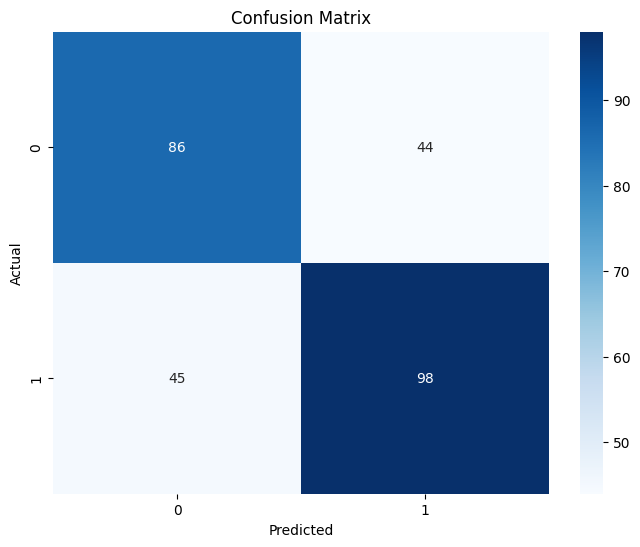

In [ ]:
# Assuming 'cm' is defined from the previous code snippet
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

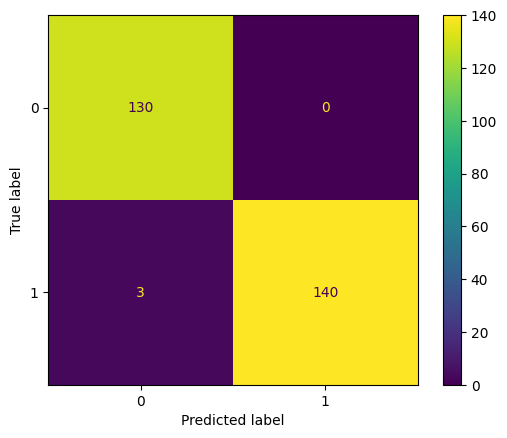

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Assuming 'rf' is your fitted model and 'x_test', 'y_test' are your test data
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

# **Code with preprocessing**

In [ ]:
# Original Dataset
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# URL = 'https://drive.google.com/file/d/1RxokJrLFbeqtHk6RtYyl1XeOQv7AJ-PO/view?usp=sharing'
# path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv("/content/heartdisease project Dataset.csv")
df.head(5)

X = df.drop("target", axis=1)
y = df.target

x_train, x_test, y_train, y_test = split(X, y, test_size=0.20, random_state=1)



# **Outlier**

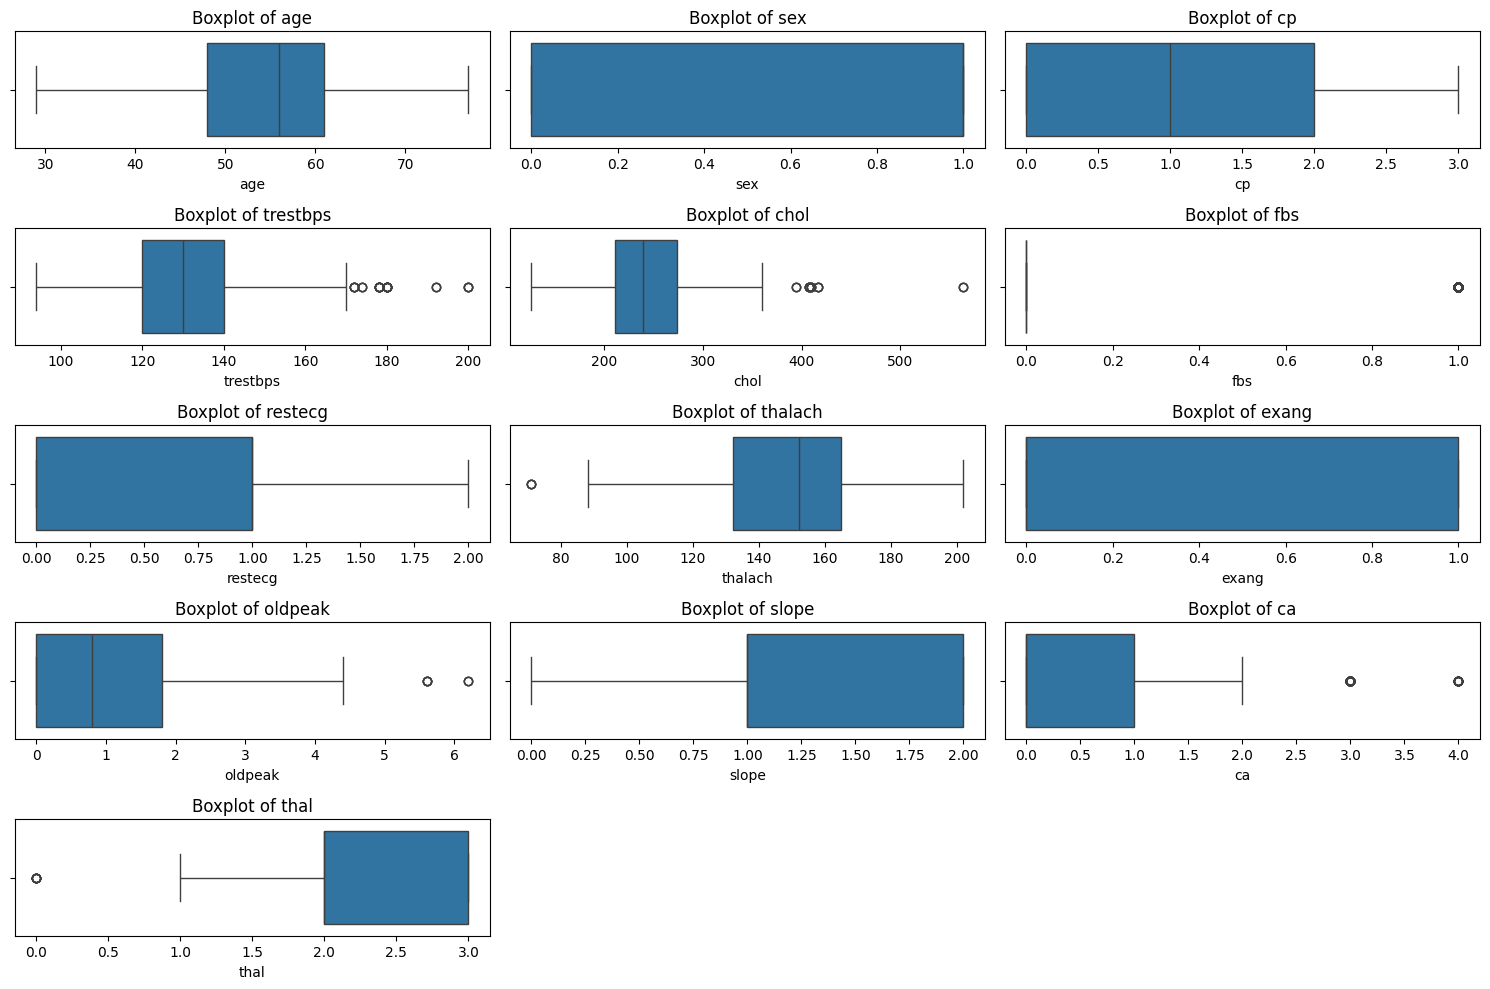

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns) // 3 + 1, 3, i)  # Create subplots dynamically
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outlier_columns = []
    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers in the column
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns

# Detect which columns in X have outliers
columns_with_outliers = detect_outliers(X)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']


In [ ]:
import pandas as pd

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(X)

# Display the columns with the most outliers
print(outlier_counts_df)


      Column  Outlier Count
5        fbs            199
11        ca            110
3   trestbps             36
4       chol             19
12      thal              9
9    oldpeak              8
7    thalach              4
0        age              0
1        sex              0
2         cp              0
6    restecg              0
8      exang              0
10     slope              0


# **Removing Outlier**

In [ ]:
import pandas as pd
import numpy as np

def replace_outliers_with_mean(df, columns):
    for col in columns:
        # Convert column to numeric, handling errors
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Calculate mean of non-outlier values
        mean_val = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].mean()
        # Replace outliers with mean
        df.loc[((df[col] < lower_bound) | (df[col] > upper_bound)), col] = mean_val
    return df

outlier_columns = ['fbs', 'ca', 'trestbps', 'chol', 'thal', 'oldpeak', 'thalach']
# Force all outlier columns to numeric before calling the function
for col in outlier_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = replace_outliers_with_mean(df, outlier_columns)

<ipython-input-99-2b694c7db8c8>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5291766586730615' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[((df[col] < lower_bound) | (df[col] > upper_bound)), col] = mean_val
<ipython-input-99-2b694c7db8c8>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.8822641509434' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[((df[col] < lower_bound) | (df[col] > upper_bound)), col] = mean_val
<ipython-input-99-2b694c7db8c8>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '242.11102831594636' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[((df[col] < lower_bo

# **Outlier removed**

In [ ]:
import pandas as pd

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(df)

# Display the columns with the most outliers
print(outlier_counts_df)


      Column  Outlier Count
4       chol              4
0        age              0
1        sex              0
2         cp              0
3   trestbps              0
5        fbs              0
6    restecg              0
7    thalach              0
8      exang              0
9    oldpeak              0
10     slope              0
11        ca              0
12      thal              0
13    target              0


In [ ]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Cap outliers in X
X = cap_outliers(X, columns_with_outliers)


# **Appling Smote**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Now you can continue with training your model using x_train_smote and y_train_smote


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)


In [ ]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=1)
x_train_smote, y_train_smote = smote_tomek.fit_resample(x_train, y_train)


In [ ]:
df2 = pd.concat([pd.DataFrame(x_train_smote), pd.DataFrame(y_train_smote)], axis=1)
# Assuming X had columns 'col1', 'col2', ... and y was 'target'
df2.columns = list(X.columns) + ['target']

# **Pie & Bar Chart after applying smote**

<ipython-input-106-b52fe8309cb7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="target", data=df, ax=ax[1], order=target, palette=p_colors)


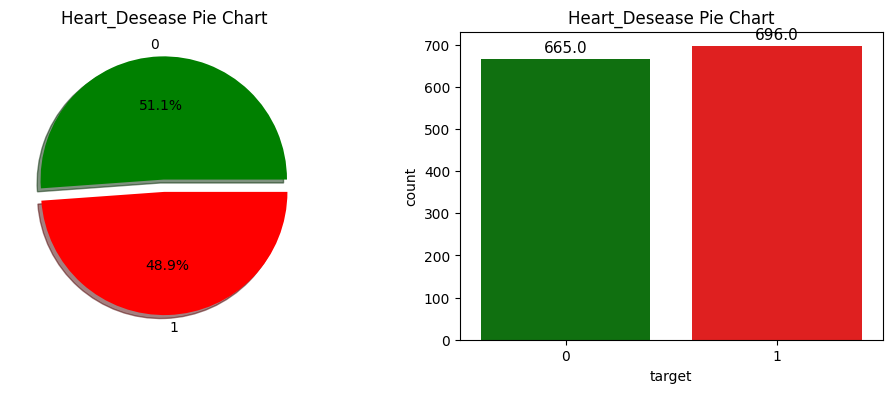

In [ ]:
p_colors = ['green', 'red'] # Added one more color
target = [0,1] # Added one more potential value to match the number of colors and corrected the names to match the df
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["target"].value_counts().plot(kind="pie", labels=target,
        colors=p_colors,explode=[0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True) # Added one more explode value
ax[0].set_title("Heart_Desease Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="target", data=df, ax=ax[1], order=target, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Heart_Desease Pie Chart")
plt.show()

# **DT After smote and Accuracy**

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate Decision Tree
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Apply Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate Random Forest
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


# Import necessary libraries
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

# Apply Support Vector Classifier (SVC)
svc_model = SVC(random_state=1)
svc_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_svc = svc_model.predict(x_test)

# Evaluate SVC
print("\nSupport Vector Classifier (SVC):")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

# Apply Extra Trees Classifier
et_model = ExtraTreesClassifier(random_state=1)
et_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_et = et_model.predict(x_test)

# Evaluate Extra Trees Classifier
print("\nExtra Trees Classifier:")
print(classification_report(y_test, y_pred_et))
print("Accuracy:", accuracy_score(y_test, y_pred_et))


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       143

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273

Accuracy: 1.0

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.98      0.99       143

    accuracy                           0.99       273
   macro avg       0.99      0.99      0.99       273
weighted avg       0.99      0.99      0.99       273

Accuracy: 0.989010989010989

Support Vector Classifier (SVC):
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       130
           1       0.71      0.67      0.69       143

    accuracy                           0.68       273

# Feature **Selection**

In [ ]:

# All Feature Selection Code in one

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  # Import SVC

# ... (Your existing data loading and preprocessing code) ...

# Assuming you have your features in a DataFrame called 'X' and target in 'y'

# 1. Chi-Square Feature Selection
# Select top k features using Chi-Square
selector_chi2 = SelectKBest(chi2, k=10)  # Select 10 features, adjust k as needed
X_new_chi2 = selector_chi2.fit_transform(X, y)

# Split data into training and testing sets
X_train_chi2, X_test_chi2, y_train, y_test = train_test_split(
    X_new_chi2, y, test_size=0.2, random_state=42
)

# 2. RFE Feature Selection
# Use RFE with a base estimator (e.g., DecisionTreeClassifier)
estimator = DecisionTreeClassifier()
selector_rfe = RFE(estimator, n_features_to_select=10)  # Select 10 features, adjust as needed
X_new_rfe = selector_rfe.fit_transform(X, y)

# Split data into training and testing sets
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(
    X_new_rfe, y, test_size=0.2, random_state=42
)


# Initialize an empty list to store the results
results = []

# 1. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)
results.append(['Decision Tree with Chi-Square', accuracy_dt_chi2])

# 2. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)
results.append(['Random Forest with RFE', accuracy_rf_rfe])

# 3. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)
results.append(['Decision Tree with RFE', accuracy_dt_rfe])

# 4. SVC with Chi-Square-selected features
svc_chi2 = SVC()  # Initialize SVC
svc_chi2.fit(X_train_chi2, y_train)
y_pred_svc_chi2 = svc_chi2.predict(X_test_chi2)
accuracy_svc_chi2 = accuracy_score(y_test, y_pred_svc_chi2)
results.append(['SVC with Chi-Square', accuracy_svc_chi2])

# 5. Extra Trees Classifier with RFE-selected features
et_rfe = ExtraTreesClassifier()  # Initialize Extra Trees
et_rfe.fit(X_train_rfe, y_train)
y_pred_et_rfe = et_rfe.predict(X_test_rfe)
accuracy_et_rfe = accuracy_score(y_test, y_pred_et_rfe)
results.append(['Extra Trees with RFE', accuracy_et_rfe])

# Display the results
print(results)


[['Decision Tree with Chi-Square', 1.0], ['Random Forest with RFE', 0.989010989010989], ['Decision Tree with RFE', 1.0], ['SVC with Chi-Square', 0.63003663003663], ['Extra Trees with RFE', 1.0]]
